In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import seaborn as sns
%matplotlib inline

In [28]:
data = pd.read_csv('./Datasets/diabetes1.csv')
df=data
print(data.isna().sum())
data=data.dropna()
data

Pregnancies                 5
Glucose                     0
BloodPressure               5
SkinThickness               3
Insulin                     4
BMI                         5
DiabetesPedigreeFunction    0
Age                         6
Outcome                     1
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
6,3.0,78,50.0,32.0,88.0,31.0,0.248,26.0,1.0
...,...,...,...,...,...,...,...,...,...
761,9.0,170,74.0,31.0,0.0,44.0,0.403,43.0,1.0
762,9.0,89,62.0,0.0,0.0,22.5,0.142,33.0,0.0
763,10.0,101,76.0,48.0,180.0,32.9,0.171,63.0,0.0
765,5.0,121,72.0,23.0,112.0,26.2,0.245,30.0,0.0


In [36]:
df.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
labels = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
outcome = data['Outcome']
xtrain, xtest, ytrain, ytest = train_test_split(labels, outcome, test_size=0.25, random_state=35)
model = GaussianNB()
model.fit(xtrain, ytrain)
preds = model.predict(xtest)

[[105  20]
 [ 30  31]]


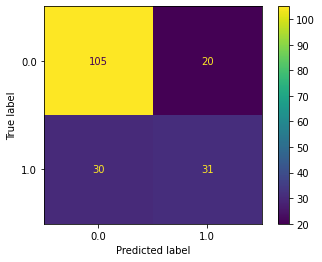

In [16]:
cm = confusion_matrix(ytest, preds)
print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmd.plot()
plt.show()

acc=0.7311827956989247,rec=0.5081967213114754, pre=0.6078431372549019, f1=0.5535714285714285, auc=0.6740983606557377


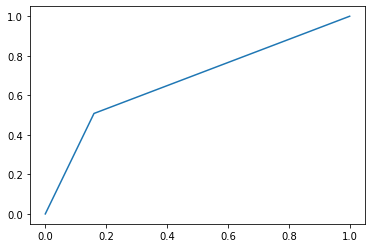

In [26]:
acc = accuracy_score(ytest,preds)
rec = recall_score(ytest, preds)
pre = precision_score(ytest, preds)
f1 = f1_score(ytest, preds)
auc = roc_auc_score(ytest, preds)
print(f"{acc=},{rec=}, {pre=}, {f1=}, {auc=}")
fprs,tprs,thresh = roc_curve(ytest, preds)
plt.plot(fprs, tprs)